My First Notebook

In [1]:
# I would like to analyze U.S.'s' oil supply and demand

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('Supply_Demand_Oil.csv')
pd.set_option('display.max_columns', None)
data.head()

,Quarter,Oced_D_Canada,Oced_D_Europe,Oced_D_Japan,Oced_D_Other OECD,Oced_D_U.S. (50 States),Oced_D_U.S. Territories,Oced_D_Total OECD,Oced_D_As % of World Demand,NOced_D_China,NOced_D_Europe,NOced_D_Former Soviet Union,NOced_D_Other Asia,NOced_D_Other Non-OECD,NOced_D_Total Non-OECD,NOced_D_As % of World Demand,Total World Demand,Oced_S_Canada,Oced_S_Mexico,Oced_S_North Sea,Oced_S_Other OECD,Oced_S_U.S. (50 States),Oced_S_Total OECD,Oced_S_As % of World Supply,NOced_S_China,NOced_S_Former Soviet Union,NOced_S_Other Non-OECD,NOced_S_Total OPEC Supply,NOced_S_Total Non-OECD,NOced_S_As % of World Supply,Total World Supply,OPEC Crude Oil Portion,OPEC Non-Crude Liquids,Total OPEC,OPEC_As % of World Supply,OECD Total Demand,OECD Total Supply,OECD Net deficit / surplus,U.S. (50 States) Total Demand,U.S. (50 States) Total Supply,U.S. (50 States) Net deficit / surplus,Former Soviet Union Total Demand,Former Soviet Union Total Supply,Former Soviet Union Net deficit / surplus,China Total Demand,China Total Supply,China Net deficit / surplus
0,2019 Q3,2.57,14.66,3.43,6.54,20.71,0.17,48.07,47.02,14.37,0.78,5.58,13.74,19.70,54.17,52.98,102.25,5.47,1.93,NaN,4.64,19.45,31.48,31.43,4.89,14.58,15.33,33.88,68.68,68.57,100.17,28.65,5.24,33.88,33.82,48.07,31.48,-16.59,20.71,19.45,-1.26,5.58,14.58,9.00,14.37,4.89,-9.48
1,2019 Q2,2.32,14.18,3.39,6.46,20.46,0.17,46.97,46.51,14.65,0.77,5.19,14.11,19.31,54.03,53.49,101.00,5.47,1.91,NaN,4.59,19.35,31.32,31.17,4.92,14.43,14.88,34.91,69.17,68.83,100.49,29.48,5.44,34.91,34.74,46.97,31.32,-15.65,20.46,19.35,-1.10,5.19,14.43,9.23,14.65,4.92,-9.72
2,2019 Q1,2.31,14.05,4.06,6.62,20.36,0.19,47.58,47.35,14.46,0.77,5.15,13.95,18.60,52.92,52.66,100.49,5.43,1.91,NaN,4.85,18.86,31.06,30.95,4.89,14.86,14.12,35.39,69.28,69.05,100.34,29.95,5.44,35.39,35.27,47.58,31.06,-16.52,20.36,18.86,-1.49,5.15,14.86,9.71,14.46,4.89,-9.57
3,2018 Q4,2.58,14.16,3.89,6.38,20.59,0.16,47.77,47.42,14.10,0.77,5.36,13.82,18.91,52.96,52.58,100.73,5.62,1.95,2.95,4.89,19.03,31.49,30.75,4.81,14.88,14.49,36.74,70.93,69.25,102.42,31.42,5.32,36.74,35.87,47.77,31.49,-16.28,20.59,19.03,-1.56,5.36,14.88,9.53,14.10,4.81,-9.29
4,2018 Q3,2.65,14.70,3.53,6.49,20.71,0.15,48.23,47.63,13.88,0.77,5.50,13.48,19.39,53.02,52.37,101.25,5.41,2.09,2.84,4.65,18.44,30.58,30.11,4.73,14.63,14.81,36.81,70.99,69.89,101.57,31.50,5.32,36.81,36.24,48.23,30.58,-17.65,20.71,18.44,-2.27,5.50,14.63,9.13,13.88,4.73,-9.15


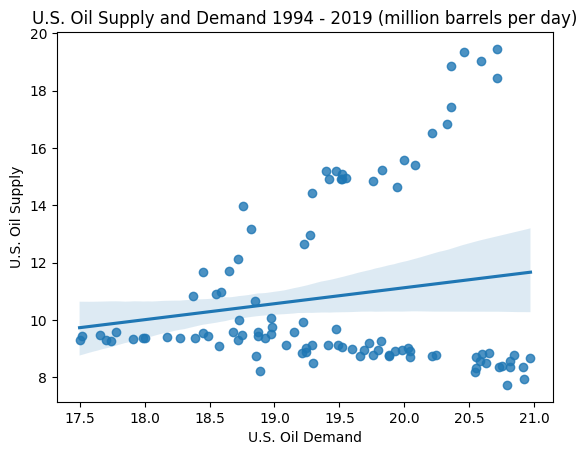

In [3]:
# First, I want to look at the relation between U.S. oil supply and demand

us_oil_demand = data['U.S. (50 States) Total Demand']
us_oil_supply = data['U.S. (50 States) Total Supply']

sns.regplot(x='U.S. (50 States) Total Demand', y='U.S. (50 States) Total Supply', data=data)
plt.title('U.S. Oil Supply and Demand 1994 - 2019 (million barrels per day)')
plt.xlabel('U.S. Oil Demand')
plt.ylabel('U.S. Oil Supply')
plt.show()

In [4]:
# Now, I want to assess if there is any relationship between U.S. oil supply 
# and total world demand for oil
    
world_oil_demand = data['Total World Demand']
world_oil_demand = sm.add_constant(world_oil_demand)

model = sm.OLS(us_oil_supply, world_oil_demand).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     U.S. (50 States) Total Supply   R-squared:                       0.621
Model:                                       OLS   Adj. R-squared:                  0.617
Method:                            Least Squares   F-statistic:                     165.4
Date:                           Thu, 06 Apr 2023   Prob (F-statistic):           5.37e-23
Time:                                   17:02:26   Log-Likelihood:                -210.59
No. Observations:                            103   AIC:                             425.2
Df Residuals:                                101   BIC:                             430.4
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -10.5958      1.676     -6.323      0.000     -13.920      -7.272
Total World Demand     0.2536      0.020     12.860      0.000       0.214       0.293
==============================================================================
Omnibus:                        7.406   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                3.587
Skew:                           0.203   Prob(JB):                        0.166
Kurtosis:                       2.180   Cond. No.                         766.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

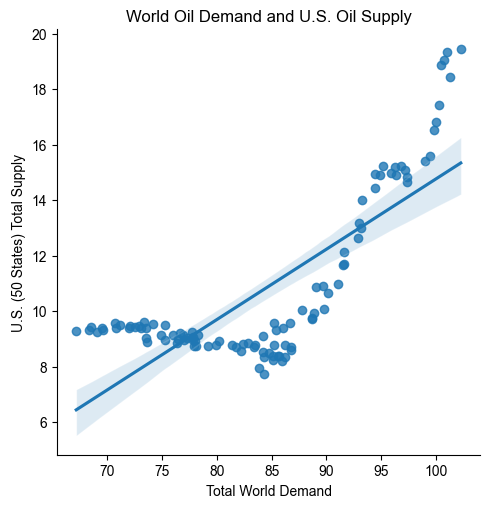

In [5]:
# The model is indicative of a relationship between U.S. oil supply and world oil demand
# U.S. oil supply doubles as world demand increase by 20% and it is statistically significant
# Figure below visualizes this relationship

sns.lmplot(data=data, x='Total World Demand', y='U.S. (50 States) Total Supply')
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(rc={'figure.figsize':(8,6)})
plt.title('World Oil Demand and U.S. Oil Supply')
plt.show()

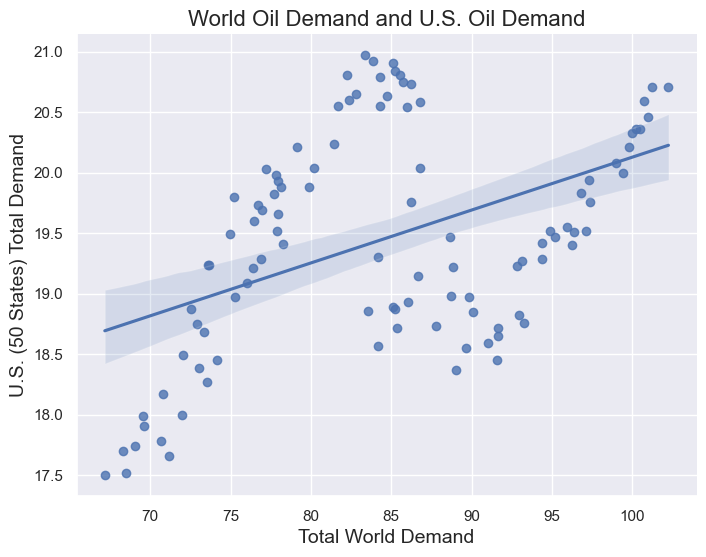

In [6]:
# World oil demand and U.S. oil demand relationship

sns.regplot(data=data, x='Total World Demand', y='U.S. (50 States) Total Demand')

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(1.7,8.27)})

sns.despine()

plt.title('World Oil Demand and U.S. Oil Demand', fontsize=16)
plt.xlabel('Total World Demand', fontsize=14)
plt.ylabel('U.S. (50 States) Total Demand', fontsize=14)

plt.show()